## Using Group By in pandas

### Find maximum temperature in each of the cities in the dataset
### Find the average windspeed in each city

#### Group the data per city, then run analytics for each group

In [1]:
import pandas as pd
df = pd.read_csv('7-7_weather_data.csv') # First read your csv file into pandas
df

day      city  temperature  windspeed   event
0   1/1/2017  new york           32          6    Rain
1   1/2/2017  new york           36          7   Sunny
2   1/3/2017  new york           28         12    Snow
3   1/4/2017  new york           33          7   Sunny
4   1/1/2017    mumbai           90          5   Sunny
5   1/2/2017    mumbai           85         12     Fog
6   1/3/2017    mumbai           87         15     Fog
7   1/4/2017    mumbai           92          5    Rain
8   1/1/2017     paris           45         20   Sunny
9   1/2/2017     paris           50         13  Cloudy
10  1/3/2017     paris           54          8  Cloudy
11  1/4/2017     paris           42         10  Cloudy

In [2]:
g = df.groupby('city') # Pass the column you want to use for your grouping as the argument
g                      # in SQL the syntax is: SELECT * from city_data GROUP BY city

In [3]:
for city, city_df in g:
    print(city)
    print(city_df)

mumbai
        day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain
new york
        day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny
paris
         day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy


In [4]:
g.get_group('mumbai') #Access a specific dataframe

day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain

### What is the maximum temperature in each city?

In [5]:
g.max() # Dividing data into groups, applying analytics, aggregating results into single dataframe = Split Apply Combine

day  temperature  windspeed  event
city                                             
mumbai    1/4/2017           92         15  Sunny
new york  1/4/2017           36         12  Sunny
paris     1/4/2017           54         20  Sunny

### What is the average windspeed in each city?

In [6]:
g.mean()

temperature  windspeed
city                            
mumbai          88.50       9.25
new york        32.25       8.00
paris           47.75      12.75

### Get all the analytics in one place

In [7]:
g.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

### Print a matplotlib chart

city
mumbai      AxesSubplot(0.125,0.125;0.775x0.755)
new york    AxesSubplot(0.125,0.125;0.775x0.755)
paris       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

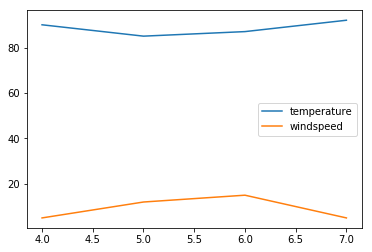

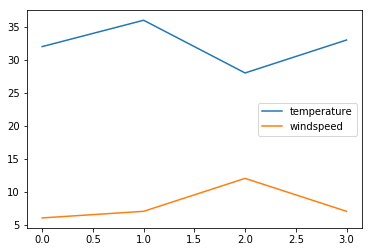

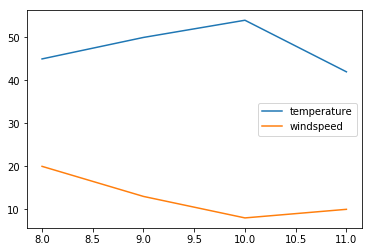

In [8]:
%matplotlib inline
g.plot()